
üìà Polynomial Regression (degree=1)
MAE: 16.0181
MSE: 406.7056
R¬≤: -0.0003


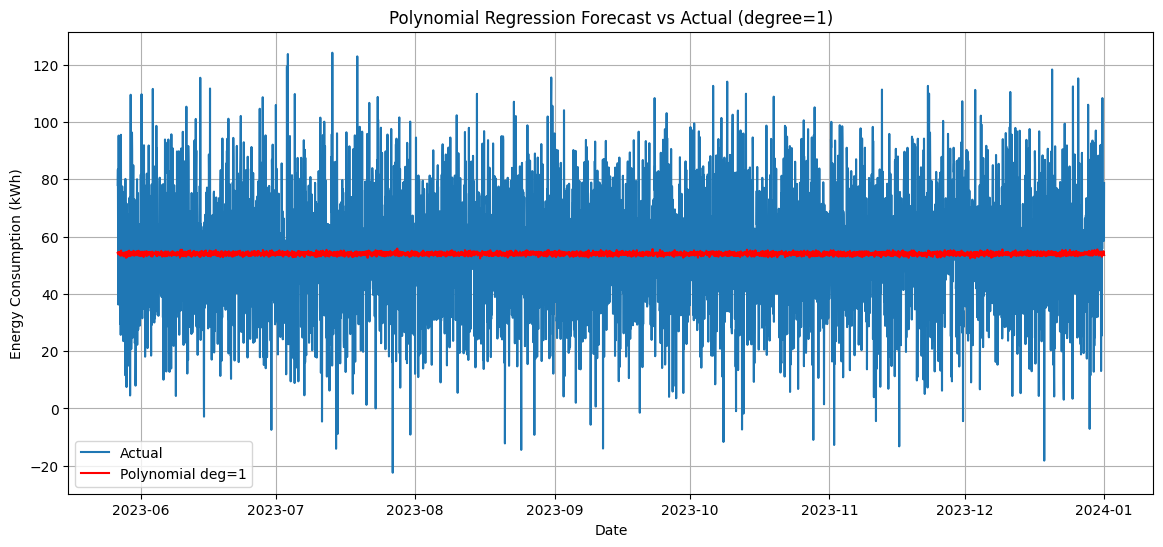


üìà Polynomial Regression (degree=2)
MAE: 16.1142
MSE: 412.2625
R¬≤: -0.0139


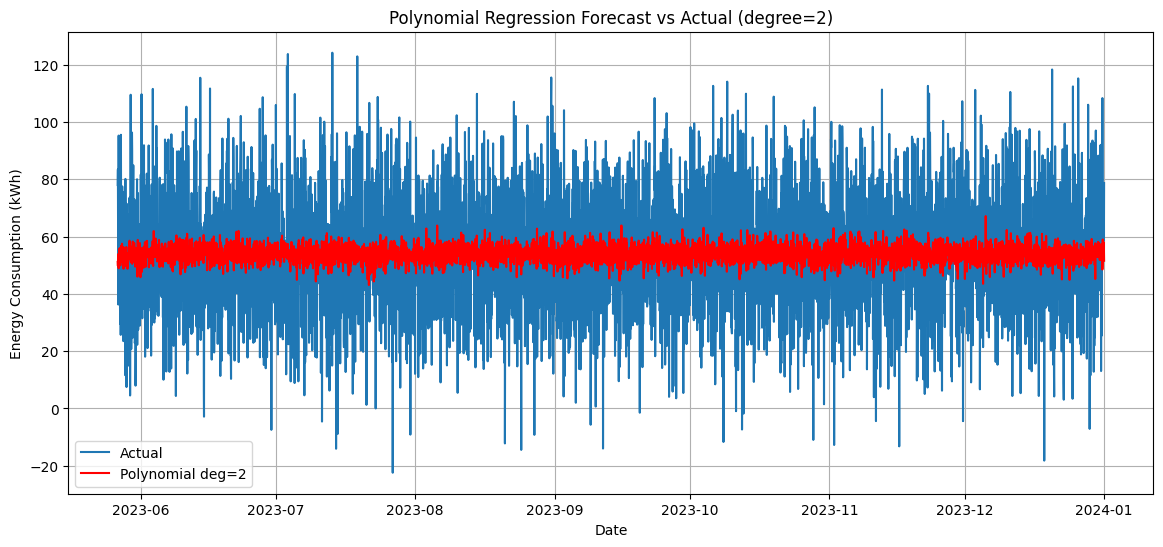

MemoryError: Unable to allocate 7.34 GiB for an array with shape (47326, 20825) and data type float64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= ÿ™ÿ®ÿØ€åŸÑ ŸÅÿ±ŸÖÿ™ ÿ™ÿßÿ±€åÿÆ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= ⁄©ÿØ⁄Øÿ∞ÿßÿ±€å ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿ∫€åÿ±ÿπÿØÿØ€å =============================
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]

df = pd.get_dummies(df, columns=categorical_cols)

# ============================= ÿ™ŸÜÿ∏€åŸÖ ÿß€åŸÜÿØ⁄©ÿ≥ Ÿà Ÿæÿ±⁄©ÿ±ÿØŸÜ ⁄ØŸæ‚ÄåŸáÿß€å ÿ≤ŸÖÿßŸÜ€å =============================
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # ŸÅŸàÿßÿµŸÑ ÿ≤ŸÖÿßŸÜ€å ÿ≥ÿßÿπÿ™€å
df.interpolate(method='linear', inplace=True)  # Ÿæÿ± ⁄©ÿ±ÿØŸÜ ⁄ØŸæ‚ÄåŸáÿß

# ============================= ÿ¨ÿØÿß ⁄©ÿ±ÿØŸÜ ÿ≥ÿ™ŸàŸÜ ŸáÿØŸÅ =============================
target_col = 'Energy Consumption (kWh)'
features = df.drop(columns=[target_col])
target = df[[target_col]]

# ============================= ŸÖŸÇ€åÿßÿ≥‚Äåÿ®ŸÜÿØ€å =============================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

features_scaled = scaler_X.fit_transform(features)
target_scaled = scaler_y.fit_transform(target)

# ============================= ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá ÿ®Ÿá ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™ =============================
train_size = int(len(features_scaled) * 0.9)
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]

# ============================= ÿ™ÿ≥ÿ™ ⁄ÜŸÜÿØÿ¨ŸÖŸÑŸá‚Äåÿß€å ÿ®ÿß ÿØÿ±ÿ¨ÿßÿ™ ŸÖÿÆÿ™ŸÑŸÅ =============================
degrees = [1, 2, 3, 4, 5]
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    # ÿ®ÿßÿ≤⁄Øÿ±ÿØÿßŸÜÿØŸÜ ŸÖŸÇ€åÿßÿ≥ ÿßÿµŸÑ€å
    y_test_orig = scaler_y.inverse_transform(y_test)
    y_pred_orig = scaler_y.inverse_transform(y_pred)
    
    mae = mean_absolute_error(y_test_orig, y_pred_orig)
    mse = mean_squared_error(y_test_orig, y_pred_orig)
    r2 = r2_score(y_test_orig, y_pred_orig)
    
    results[d] = (mae, mse, r2)
    
    print(f"\nüìà Polynomial Regression (degree={d})")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R¬≤: {r2:.4f}")
    
    # ÿ™ÿ±ÿ≥€åŸÖ
    plt.figure(figsize=(14,6))
    plt.plot(df.index[-len(y_test_orig):], y_test_orig, label="Actual")
    plt.plot(df.index[-len(y_pred_orig):], y_pred_orig, label=f"Polynomial deg={d}", color="red")
    plt.legend()
    plt.title(f"Polynomial Regression Forecast vs Actual (degree={d})")
    plt.xlabel("Date")
    plt.ylabel("Energy Consumption (kWh)")
    plt.grid()
    plt.show()


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 34ms/step - loss: 0.0213 - val_loss: 0.0151
Epoch 2/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 29ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 3/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44s 33ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 4/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 32ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 5/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 33ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 6/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 27ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 7/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 28ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 8/10
1331/1331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 28ms

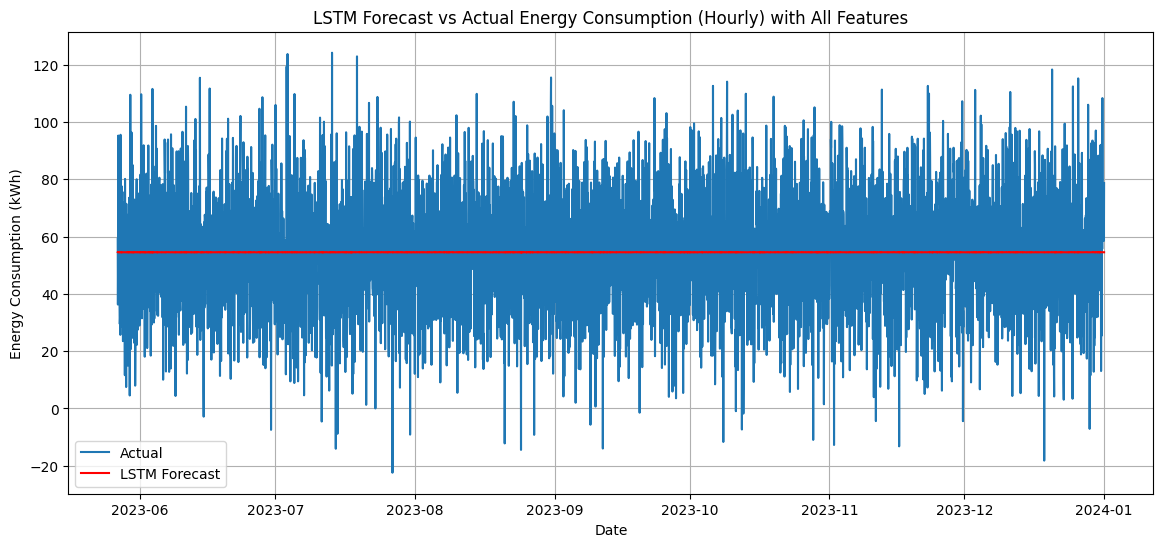

In [ ]:
###############################LSTM+SARIMA###########3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= ÿ™ÿ®ÿØ€åŸÑ ŸÅÿ±ŸÖÿ™ ÿ™ÿßÿ±€åÿÆ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= ⁄©ÿØ⁄Øÿ∞ÿßÿ±€å ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿ∫€åÿ±ÿπÿØÿØ€å =============================
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]

df = pd.get_dummies(df, columns=categorical_cols)

# ============================= ÿ™ŸÜÿ∏€åŸÖ ÿß€åŸÜÿØ⁄©ÿ≥ Ÿà Ÿæÿ±⁄©ÿ±ÿØŸÜ ⁄ØŸæ‚ÄåŸáÿß€å ÿ≤ŸÖÿßŸÜ€å =============================
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # ŸÅŸàÿßÿµŸÑ ÿ≤ŸÖÿßŸÜ€å ÿ≥ÿßÿπÿ™€å
df.interpolate(method='linear', inplace=True)  # Ÿæÿ± ⁄©ÿ±ÿØŸÜ ⁄ØŸæ‚ÄåŸáÿß

# ============================= ÿ¨ÿØÿß ⁄©ÿ±ÿØŸÜ ÿ≥ÿ™ŸàŸÜ ŸáÿØŸÅ =============================
target_col = 'Energy Consumption (kWh)'
features = df.drop(columns=[target_col])
target = df[[target_col]]

# ============================= ŸÖŸÇ€åÿßÿ≥‚Äåÿ®ŸÜÿØ€å =============================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

features_scaled = scaler_X.fit_transform(features)
target_scaled = scaler_y.fit_transform(target)

# ============================= ÿ≥ÿßÿÆÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸàÿßŸÑ€å ÿ®ÿ±ÿß€å LSTM =============================
def create_dataset_multivariate(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24
X, y = create_dataset_multivariate(features_scaled, target_scaled, time_steps)

# ============================= ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá ÿ®Ÿá ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™ =============================
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ============================= ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ LSTM =============================
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# ============================= ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ =============================
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# ============================= Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å =============================
y_pred_scaled = model.predict(X_test)

# ============================= ÿ®ÿ±⁄Øÿ±ÿØÿßŸÜÿØŸÜ ŸÖŸÇ€åÿßÿ≥ ÿ®Ÿá ÿ≠ÿßŸÑÿ™ ÿßŸàŸÑ€åŸá =============================
y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled)

# ============================= ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ =============================
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("\nüìà ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ LSTM ÿ®ÿß ÿ™ŸÖÿßŸÖ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R¬≤: {r2:.4f}")

# ============================= ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± =============================
plt.figure(figsize=(14, 6))
plt.plot(df.index[-len(y_test_orig):], y_test_orig, label='Actual')
plt.plot(df.index[-len(y_test_orig):], y_pred_orig, label='LSTM Forecast', color='red')
plt.legend()
plt.title("LSTM Forecast vs Actual Energy Consumption (Hourly) with All Features")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.grid()
plt.show()


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



üìä ÿØÿßÿØŸá ÿ¢ŸÖÿßÿØŸá ÿ®ÿ±ÿß€å Prophet ÿ®ÿπÿØ ÿßÿ≤ ÿ™⁄©ŸÖ€åŸÑ ÿ≥ÿßÿπÿ™€å:
                   ds          y
0 2018-01-01 00:00:00  74.679912
1 2018-01-01 01:00:00  66.758285
2 2018-01-01 02:00:00  58.836657
3 2018-01-01 03:00:00  53.586516
4 2018-01-01 04:00:00  37.800448
5 2018-01-01 05:00:00  62.581492
6 2018-01-01 06:00:00  52.855726
7 2018-01-01 07:00:00  56.874796
8 2018-01-01 08:00:00  60.893866
9 2018-01-01 09:00:00  46.232676


17:33:24 - cmdstanpy - INFO - Chain [1] start processing
17:33:38 - cmdstanpy - INFO - Chain [1] done processing



üìà ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ Prophet:
MAE: 14.8532
MSE: 352.1252
R¬≤: -0.0041


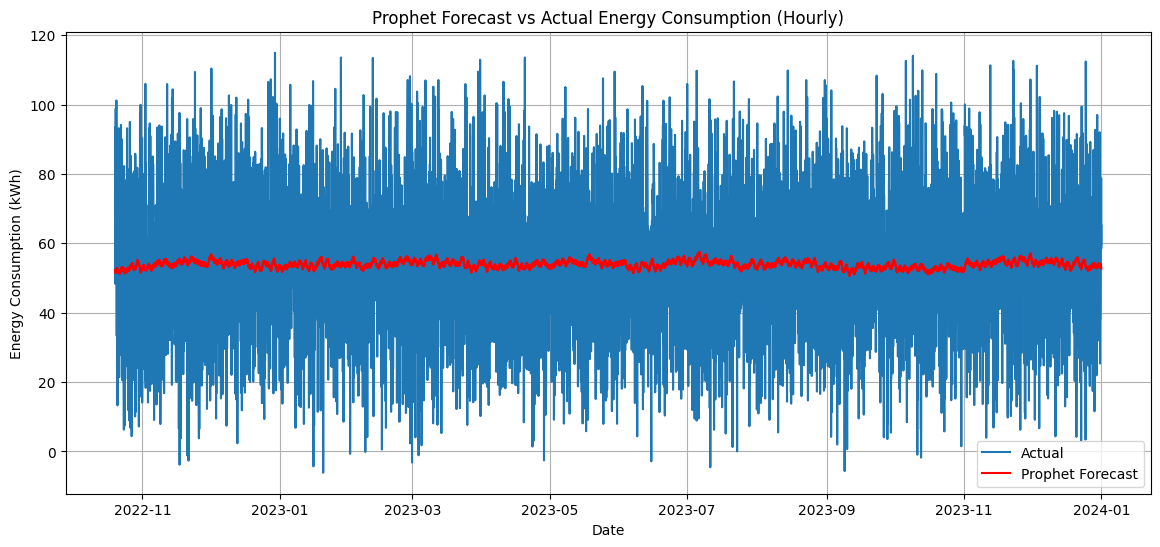

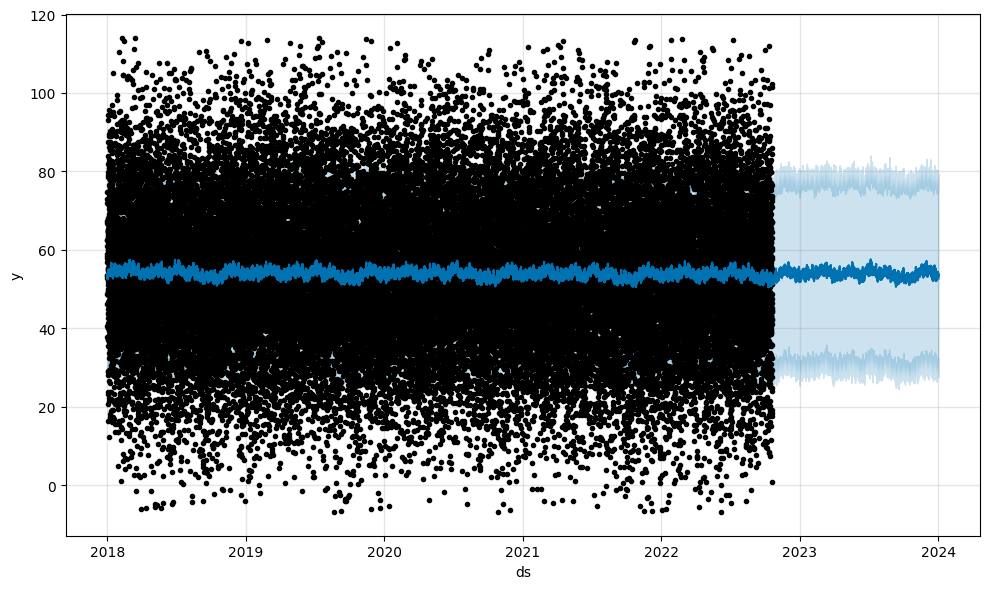

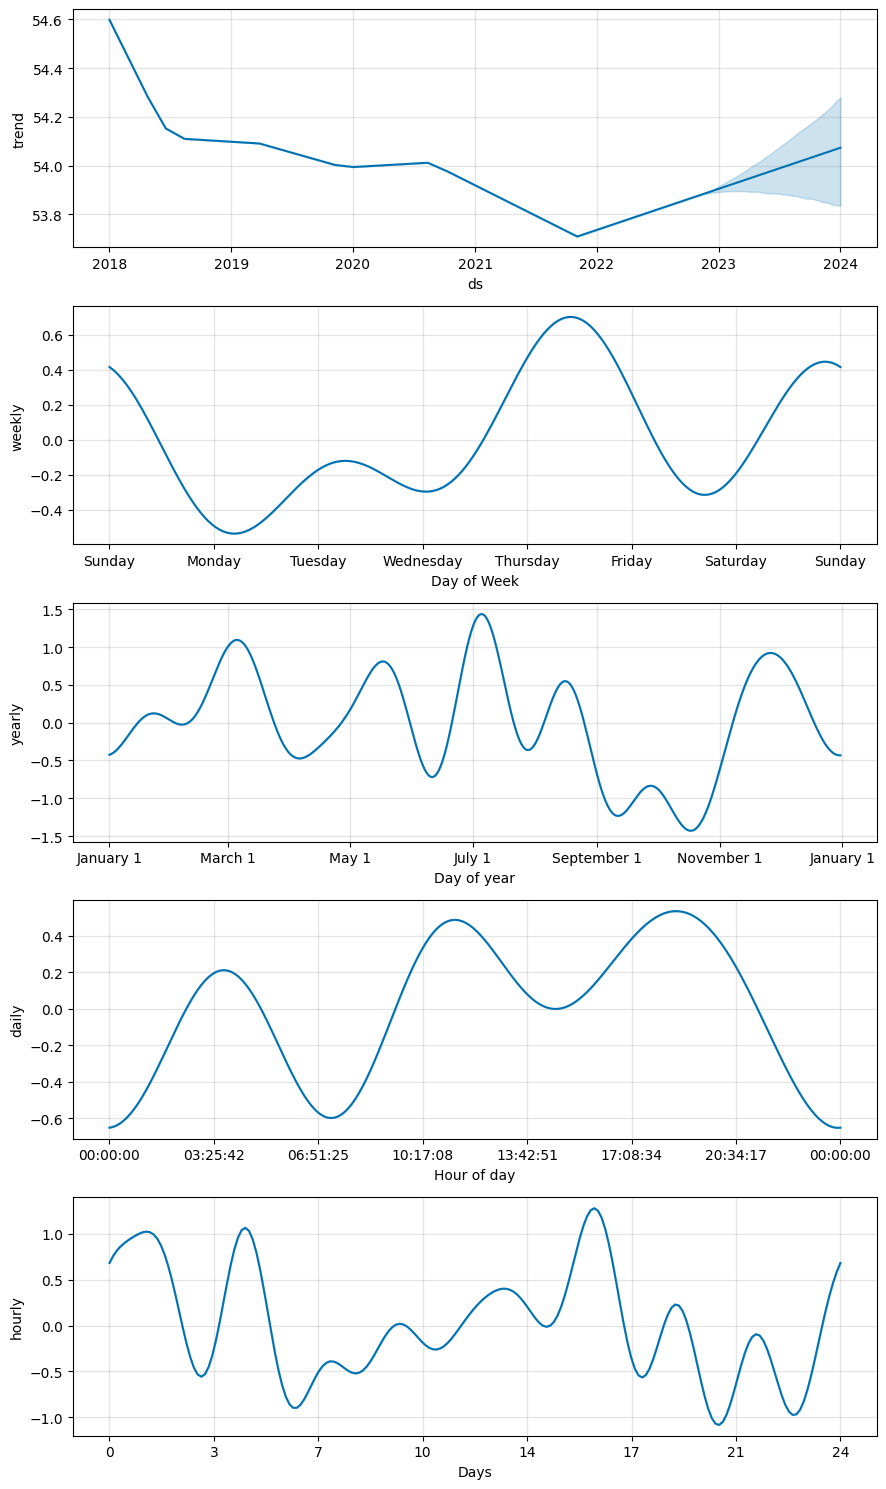

In [2]:
################################prophet#########
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= ÿ™ÿ®ÿØ€åŸÑ ŸÅÿ±ŸÖÿ™ ÿ™ÿßÿ±€åÿÆ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# ÿ≠ÿ∞ŸÅ ÿ™ÿßÿ±€åÿÆ‚ÄåŸáÿß€å ŸÜÿßŸÖÿπÿ™ÿ®ÿ±
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ÿ≠ÿ∞ŸÅ ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿæÿ±ÿ™ ÿ®ÿß Z-score
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# ============================= ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ≤ŸÖÿßŸÜ€å =============================
df.sort_values(by='Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá ÿ®ÿ±ÿß€å Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)

# ============================= ÿ™⁄©ŸÖ€åŸÑ ŸÅŸàÿßÿµŸÑ ÿ≤ŸÖÿßŸÜ€å ÿ≥ÿßÿπÿ™€å =============================
df_prophet = df_prophet.set_index('ds').asfreq('h')  # ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá h ⁄©Ÿà⁄Ü⁄© ÿ®ÿ±ÿß€å pandas ÿ¨ÿØ€åÿØ
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')  # Ÿæÿ± ⁄©ÿ±ÿØŸÜ ⁄ØŸæ‚ÄåŸáÿß
df_prophet.reset_index(inplace=True)

print("\nüìä ÿØÿßÿØŸá ÿ¢ŸÖÿßÿØŸá ÿ®ÿ±ÿß€å Prophet ÿ®ÿπÿØ ÿßÿ≤ ÿ™⁄©ŸÖ€åŸÑ ÿ≥ÿßÿπÿ™€å:")
print(df_prophet.head(10))

# ============================= ÿ™ŸÇÿ≥€åŸÖ ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™ =============================
train_size = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# ============================= ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ Prophet =============================
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.add_seasonality(name='hourly', period=24, fourier_order=10)


model.fit(train)

# ============================= ÿ≥ÿßÿÆÿ™ future ÿ®ÿß ŸÖÿ™ÿØ Prophet =============================
future = model.make_future_dataframe(periods=len(test), freq='h')

# ============================= Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å =============================
forecast = model.predict(future)

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá ÿ®ÿ±ÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å =============================
df_eval = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds', how='inner')

y_true = df_eval['y'].values
y_pred = df_eval['yhat'].values

# ============================= ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ =============================
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nüìà ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ Prophet:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R¬≤: {r2:.4f}")

# ============================= ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± =============================
plt.figure(figsize=(14, 6))
plt.plot(df_eval['ds'], y_true, label='Actual')
plt.plot(df_eval['ds'], y_pred, label='Prophet Forecast', color='red')
plt.legend()
plt.title("Prophet Forecast vs Actual Energy Consumption (Hourly)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.grid()
plt.show()

# ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß€å ÿØÿßÿÆŸÑ€å Prophet
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()


20:51:39 - cmdstanpy - INFO - Chain [1] start processing
20:51:55 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1/5


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1314/1314 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 13ms/step - loss: 0.0412
Epoch 2/5
1314/1314 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 14ms/step - loss: 0.0224
Epoch 3/5
1314/1314 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 14ms/step - loss: 0.0213
Epoch 4/5
1314/1314 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 14ms/step - loss: 0.0213
Epoch 5/5
1314/1314 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 13ms/step - loss: 0.0213
329/329 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step

ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ Prophet:
MAE: 14.8488
R2: -0.0039

ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ LSTM:
MAE: 13.6362
R2: 0.1069

ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ™ÿ±⁄©€åÿ®€å (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ÿßÿØŸá):
MAE: 14.0850
R2: 0.0769


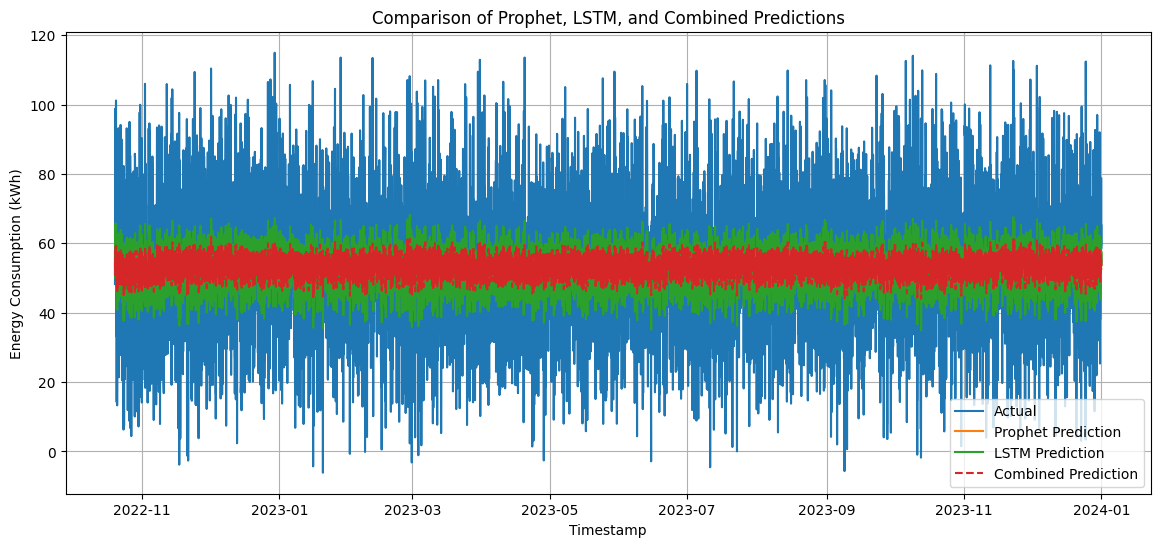

In [ ]:
##################################LSTM+prophet####################33
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ ŸÖÿ¥ÿßÿ®Ÿá =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

df.sort_values(by='Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ±ÿß€å Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)

df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

# ============================= ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá =============================
train_size = int(len(df_prophet) * 0.8)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# ========== ŸÖÿØŸÑ Prophet ==========
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.add_seasonality(name='hourly', period=24, fourier_order=10)
model.fit(train_prophet)

future = model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = model.predict(future)

df_eval_prophet = forecast[['ds', 'yhat']].merge(test_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá ÿ®ÿ±ÿß€å LSTM =============================
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_prophet[['y']].values)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # 24 ÿ≥ÿßÿπÿ™ ŸæŸÜÿ¨ÿ±Ÿá
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ LSTM =============================
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# ============================= Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ®ÿß LSTM =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# ÿ™ŸÜÿ∏€åŸÖ ÿ¥ÿßÿÆÿµ‚ÄåŸáÿß€å ÿ≤ŸÖÿßŸÜ€å ÿ®ÿ±ÿß€å ÿØÿßÿØŸá ÿ™ÿ≥ÿ™ LSTM (⁄ÜŸàŸÜ ÿØŸÜÿ®ÿßŸÑŸá ÿßÿ≥ÿ™)
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ™ÿ±⁄©€åÿ® =============================
# ŸÅŸÇÿ∑ ÿ®ÿÆÿ¥ ÿ™ÿ≥ÿ™ Prophet ⁄©Ÿá ÿ®ÿß LSTM ÿ®ÿ±ÿßÿ®ÿ± ÿ®ÿßÿ¥ÿØ:
df_eval_prophet_cut = df_eval_prophet[df_eval_prophet['ds'].isin(time_index_test)]

# ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≤ŸÖÿßŸÜ
df_eval_prophet_cut = df_eval_prophet_cut.sort_values('ds').reset_index(drop=True)
time_index_test = time_index_test.reset_index(drop=True)

# ============================= ÿ™ÿ±⁄©€åÿ® Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ÿßÿØŸá) =============================
combined_pred = (df_eval_prophet_cut['yhat'].values + y_pred_lstm.flatten()) / 2

# ============================= ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ‚ÄåŸáÿß =============================
y_true = df_eval_prophet_cut['y'].values
y_pred_prophet = df_eval_prophet_cut['yhat'].values
y_pred_lstm = y_pred_lstm.flatten()

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ Prophet:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_prophet):.4f}")
print(f"R2: {r2_score(y_true, y_pred_prophet):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ LSTM:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ™ÿ±⁄©€åÿ®€å (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ÿßÿØŸá):")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test, y_true, label='Actual')
plt.plot(time_index_test, y_pred_prophet, label='Prophet Prediction')
plt.plot(time_index_test, y_pred_lstm, label='LSTM Prediction')
plt.plot(time_index_test, combined_pred, label='Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


In [ ]:
##############################SARIMA##################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore

# ======================== ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å Ÿà Ÿæÿß⁄©ÿ≥ÿßÿ≤€å ÿØÿßÿØŸá ==========================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ÿ™ÿ®ÿØ€åŸÑ ŸÅÿ±ŸÖÿ™ ÿ≥ÿ™ŸàŸÜ Timestamp Ÿà ÿ™ŸÜÿ∏€åŸÖ ÿß€åŸÜÿØ⁄©ÿ≥ ÿ≤ŸÖÿßŸÜ€å
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.sort_values('Timestamp', inplace=True)
df.set_index('Timestamp', inplace=True)      # ÿß€åŸÜ ÿÆÿ∑ ÿÆ€åŸÑ€å ŸÖŸáŸÖ ÿßÿ≥ÿ™
df = df.asfreq('h')  # ÿ™ÿπ€å€åŸÜ ŸÅÿ±⁄©ÿßŸÜÿ≥ ÿØÿßÿØŸá Ÿáÿß ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ≥ÿßÿπÿ™€å

# ÿ≠ÿ∞ŸÅ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å
df = df.drop_duplicates()

# ÿ≠ÿ∞ŸÅ ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿæÿ±ÿ™ ÿ®ÿß z-score ŸÅŸÇÿ∑ ÿ±Ÿà€å ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿπÿØÿØ€å
numeric_df = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_df))
df = df[(z_scores < 3).all(axis=1)]

# ======================== ÿ™ÿπ€å€åŸÜ ŸÖÿ™ÿ∫€åÿ± ŸáÿØŸÅ Ÿà Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß ==========================
target_col = 'Energy Consumption (kWh)'

# ÿ™ŸÖÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿπÿØÿØ€å ÿ®Ÿá ÿ¨ÿ≤ ŸáÿØŸÅ ÿ®Ÿá ÿπŸÜŸàÿßŸÜ Ÿà€å⁄ò⁄Ø€å (exogenous variables)
features = df.select_dtypes(include=[np.number]).columns.drop(target_col)

X = df[features]
y = df[target_col]

# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá ÿ®Ÿá ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™ (ÿ®ÿ±ÿßÿ≥ÿßÿ≥ ÿ≤ŸÖÿßŸÜÿå 80 ÿØÿ±ÿµÿØ ÿ¢ŸÖŸàÿ≤ÿ¥)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# ======================== ÿßŸÜÿ™ÿÆÿßÿ® ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÖÿØŸÑ SARIMA ÿ®ÿß Auto ARIMA ==========================
auto_model = auto_arima(
    y_train,
    exogenous=X_train,
    seasonal=True,
    m=24,                # ÿØŸàÿ±Ÿá ŸÅÿµŸÑ€å 24 ÿ≥ÿßÿπÿ™Ÿá ÿ®ÿ±ÿß€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßÿπÿ™€å
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(f"Best SARIMAX order: {auto_model.order}, seasonal_order: {auto_model.seasonal_order}")

# ======================== ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ SARIMAX ==========================
sarima_model = SARIMAX(
    y_train,
    exog=X_train,
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order
)
sarima_result = sarima_model.fit(disp=False)

# ======================== Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖÿØŸÑ SARIMAX ==========================
sarima_forecast = sarima_result.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# ======================== ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ®ÿßŸÇ€åŸÖÿßŸÜÿØŸá‚ÄåŸáÿß (Residuals) ==========================
residuals = y_test.values - sarima_forecast.values

# ======================== ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ LSTM ÿ±Ÿà€å Residuals ==========================
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_lstm, y_lstm = create_sequences(residuals_scaled, seq_length)

split_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split_lstm], X_lstm[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:split_lstm], y_lstm[split_lstm:]

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, verbose=1)

lstm_pred_scaled = model_lstm.predict(X_test_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# ======================== ÿ™ÿ±⁄©€åÿ® Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ==========================
sarima_aligned = sarima_forecast[-len(lstm_pred):].values
final_forecast = sarima_aligned + lstm_pred.flatten()

# ======================== ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ==========================
true_values = y_test[-len(lstm_pred):].values
mae = mean_absolute_error(true_values, final_forecast)
mse = mean_squared_error(true_values, final_forecast)
r2 = r2_score(true_values, final_forecast)

print("\nüîÅ Hybrid SARIMA + LSTM Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R¬≤ Score: {r2:.4f}")

# ======================== ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± ==========================
plt.figure(figsize=(14,6))
plt.plot(true_values, label='Actual')
plt.plot(sarima_aligned, label='SARIMA Forecast')
plt.plot(final_forecast, label='Hybrid Forecast (SARIMA + LSTM)', color='red')
plt.legend()
plt.title("Hybrid SARIMA + LSTM Forecasting")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption (kWh)")
plt.show()


C:\Users\Adrina\AppData\Local\Temp\ipykernel_13476\2381989376.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')  # ÿ™ÿπ€å€åŸÜ ŸÅÿ±⁄©ÿßŸÜÿ≥ ÿØÿßÿØŸá Ÿáÿß ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ≥ÿßÿπÿ™€å
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\li

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=895.55 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=265488.730, Time=0.70 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=265491.466, Time=84.63 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=265491.263, Time=19.95 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[24]             : AIC=329008.957, Time=0.60 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=265489.311, Time=34.50 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MemoryError: Unable to allocate 143. MiB for an array with shape (30057, 25, 25) and data type float64

18:50:01 - cmdstanpy - INFO - Chain [1] start processing
18:50:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 17ms/step - loss: 0.0299
Epoch 2/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - loss: 0.0284
Epoch 3/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 19ms/step - loss: 0.0277
Epoch 4/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - loss: 0.0280
Epoch 5/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 17ms/step - loss: 0.0276
Epoch 6/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - loss: 0.0280
Epoch 7/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 18ms/step - loss: 0.0276
Epoch 8/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - loss: 0.0278
Epoch 9/20
657/657 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - loss: 0.0273
Epoch 10/20
657/657

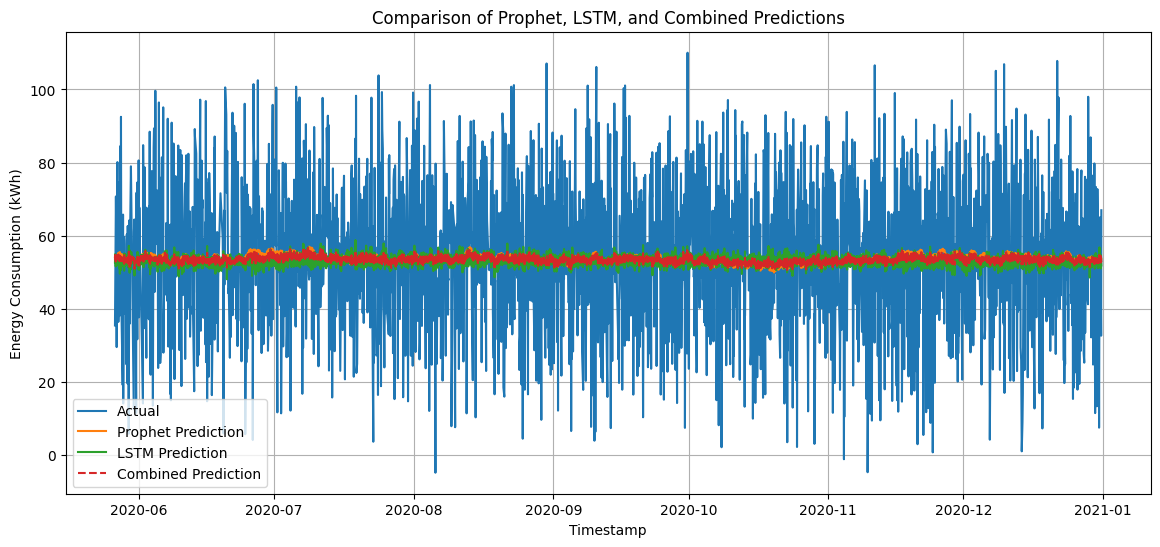

In [10]:
################################## LSTM + Prophet with all Features & dayofweek-month ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ÿ≠ÿ∞ŸÅ outlier Ÿáÿß
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿ™ŸÇŸà€åŸÖ€å ÿ≥ÿßÿπÿ™ÿßŸÜŸá
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ±ÿß€å Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

# ÿ™ŸÇÿ≥€åŸÖ train/test
train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# ============================= ŸÖÿØŸÑ Prophet =============================
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å LSTM =============================
# ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ™ŸÖÿßŸÖ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿπÿØÿØ€å + ÿ≥ÿßÿπÿ™ÿßŸÜŸá
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('Energy Consumption (kWh)')

# ŸÖŸÇ€åÿßÿ≥‚Äåÿ®ŸÜÿØ€å Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols + ['Energy Consumption (kWh)']].values)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
        y.append(data[i+seq_length, -1])     # target
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ LSTM =============================
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, X.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# ============================= Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å LSTM =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)
# ŸÅŸÇÿ∑ target ÿ¢ÿÆÿ± ÿØÿ± scaler ÿßÿ≥ÿ™
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# ============================= ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß€å€å ÿ≤ŸÖÿßŸÜ‚ÄåŸáÿß =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))
combined_pred = (prophet_cut['yhat'].values[:min_len] + y_pred_lstm[:min_len]) / 2
y_true = prophet_cut['y'].values[:min_len]

# ============================= ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ‚ÄåŸáÿß =============================
print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ Prophet:")
print(f"MAE: {mean_absolute_error(y_true, prophet_cut['yhat'].values[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, prophet_cut['yhat'].values[:min_len]):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ LSTM:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm[:min_len]):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ™ÿ±⁄©€åÿ®€å (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ÿßÿØŸá):")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_cut['yhat'].values[:min_len], label='Prophet Prediction')
plt.plot(time_index_test[:min_len], y_pred_lstm[:min_len], label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


19:02:59 - cmdstanpy - INFO - Chain [1] start processing
19:03:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64s 92ms/step - loss: 0.0360
Epoch 2/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57s 87ms/step - loss: 0.0284
Epoch 3/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64s 98ms/step - loss: 0.0280
Epoch 4/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61s 92ms/step - loss: 0.0276
Epoch 5/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60s 91ms/step - loss: 0.0278
Epoch 6/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 88ms/step - loss: 0.0281
Epoch 7/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58s 89ms/step - loss: 0.0274
Epoch 8/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61s 92ms/step - loss: 0.0276
Epoch 9/25
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58s 89ms/step - loss: 0.0276
Epoch 10/25
656/656

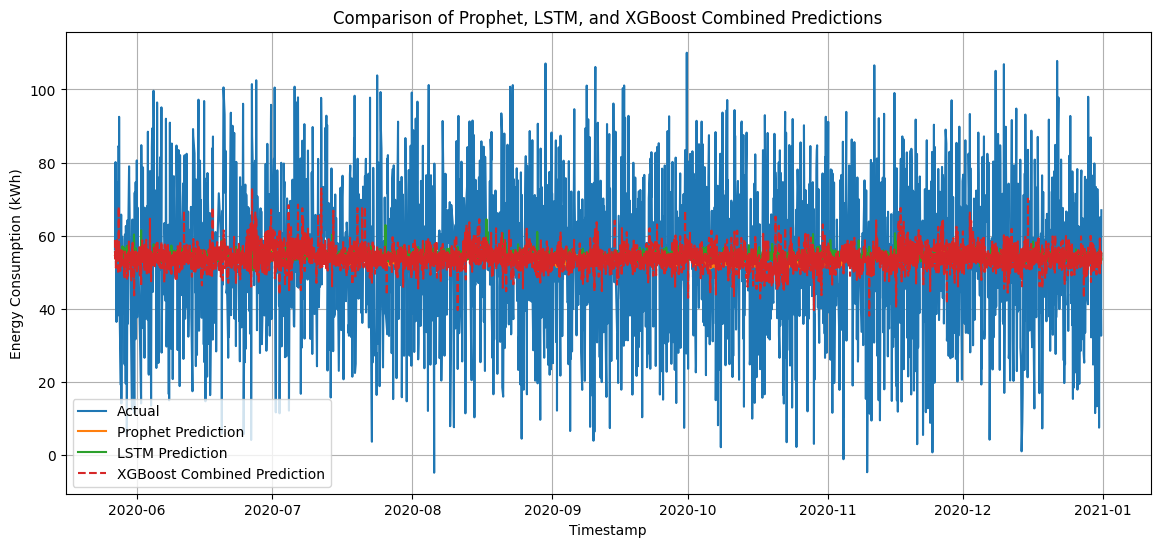

In [ ]:
################################## LSTM + Prophet + XGBoost Meta-Learner ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore
from xgboost import XGBRegressor

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ÿ≠ÿ∞ŸÅ outlier Ÿáÿß
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿ™ŸÇŸà€åŸÖ€å ÿ≥ÿßÿπÿ™ÿßŸÜŸá
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= Prophet (ŸÅŸÇÿ∑ ÿ±ŸàŸÜÿØ Ÿà ŸÅÿµŸÑ) =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= LSTM (ŸÜŸàÿ≥ÿßŸÜÿßÿ™ ÿ®ÿß ÿ™ŸÖÿßŸÖ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß) =============================
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('Energy Consumption (kWh)')

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols + ['Energy Consumption (kWh)']].values)

def create_sequences(data, seq_length=72):  # ÿßŸÅÿ≤ÿß€åÿ¥ ÿ®Ÿá 72 ÿ≥ÿßÿπÿ™
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
        y.append(data[i+seq_length, -1])     # target
    return np.array(X), np.array(y)

seq_length = 72
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=False, input_shape=(seq_length, X.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

y_pred_lstm_scaled = lstm_model.predict(X_test)
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# ============================= ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß€å€å ÿ≤ŸÖÿßŸÜ‚ÄåŸáÿß =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

y_true = prophet_cut['y'].values[:min_len]
prophet_pred = prophet_cut['yhat'].values[:min_len]
lstm_pred = y_pred_lstm[:min_len]

# ============================= ÿ™ÿ±⁄©€åÿ® Ÿæ€åÿ¥ÿ±ŸÅÿ™Ÿá ÿ®ÿß XGBoost =============================
meta_features = pd.DataFrame({
    "prophet_pred": prophet_pred,
    "lstm_pred": lstm_pred,
})
meta_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
meta_model.fit(meta_features, y_true)
combined_pred = meta_model.predict(meta_features)

# ============================= ÿßÿ±ÿ≤€åÿßÿ®€å =============================
print("\nÿßÿ±ÿ≤€åÿßÿ®€å Prophet:")
print(f"MAE: {mean_absolute_error(y_true, prophet_pred):.4f}")
print(f"R2: {r2_score(y_true, prophet_pred):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å LSTM:")
print(f"MAE: {mean_absolute_error(y_true, lstm_pred):.4f}")
print(f"R2: {r2_score(y_true, lstm_pred):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ™ÿ±⁄©€åÿ®€å XGBoost:")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_pred, label='Prophet Prediction')
plt.plot(time_index_test[:min_len], lstm_pred, label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='XGBoost Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and XGBoost Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


In [ ]:
################################## LSTM + Prophet + XGBoost Meta-Learner -->(Log(y) Transform) ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore
from xgboost import XGBRegressor

# ============================= ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ÿ≠ÿ∞ŸÅ outlier Ÿáÿß
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿ™ŸÇŸà€åŸÖ€å ÿ≥ÿßÿπÿ™ÿßŸÜŸá
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ y_log
df['y_log'] = np.log1p(df['Energy Consumption (kWh)'])

# ============================= Prophet (ŸÅŸÇÿ∑ ÿ±ŸàŸÜÿØ Ÿà ŸÅÿµŸÑ ÿ±Ÿà€å log) =============================
df_prophet = df[['Timestamp', 'y_log']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'y_log': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= LSTM (ÿ±Ÿà€å log) =============================
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('Energy Consumption (kWh)')  # target ÿßÿµŸÑ€å ÿ≠ÿ∞ŸÅ ŸÖ€åÿ¥Ÿá

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols].values)  # ÿ¥ÿßŸÖŸÑ y_log

def create_sequences(data, seq_length=72):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß (ÿ®ÿØŸàŸÜ y_log)
        y.append(data[i+seq_length, -1])     # target: y_log
    return np.array(X), np.array(y)

seq_length = 72
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=False, input_shape=(seq_length, X.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å LSTM
y_pred_lstm_scaled = lstm_model.predict(X_test)

# ÿ®ÿ±⁄Øÿ±ÿØÿßŸÜÿØŸÜ ÿ®Ÿá ŸÖŸÇ€åÿßÿ≥ log ŸàÿßŸÇÿπ€å
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm_log = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual_log = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ŸÖŸÇ€åÿßÿ≥ ÿßÿµŸÑ€å
y_pred_lstm = np.expm1(y_pred_lstm_log)
y_test_actual = np.expm1(y_test_actual_log)

# ============================= ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß€å€å ÿ≤ŸÖÿßŸÜ‚ÄåŸáÿß =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

# y_true Ÿà prophet_pred ÿ±Ÿà€å ŸÖŸÇ€åÿßÿ≥ ÿßÿµŸÑ€å
y_true = np.expm1(prophet_cut['y'].values[:min_len])
prophet_pred = np.expm1(prophet_cut['yhat'].values[:min_len])
lstm_pred = y_pred_lstm[:min_len]

# ============================= ÿ™ÿ±⁄©€åÿ® Ÿæ€åÿ¥ÿ±ŸÅÿ™Ÿá ÿ®ÿß XGBoost =============================
meta_features = pd.DataFrame({
    "prophet_pred": prophet_pred,
    "lstm_pred": lstm_pred,
})
meta_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
meta_model.fit(meta_features, y_true)
combined_pred = meta_model.predict(meta_features)

# ============================= ÿßÿ±ÿ≤€åÿßÿ®€å =============================
print("\nÿßÿ±ÿ≤€åÿßÿ®€å Prophet (log-transform):")
print(f"MAE: {mean_absolute_error(y_true, prophet_pred):.4f}")
print(f"R2: {r2_score(y_true, prophet_pred):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å LSTM (log-transform):")
print(f"MAE: {mean_absolute_error(y_true, lstm_pred):.4f}")
print(f"R2: {r2_score(y_true, lstm_pred):.4f}")

print("\nÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ™ÿ±⁄©€åÿ®€å XGBoost (log-transform):")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ± =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_pred, label='Prophet Prediction')
plt.plot(time_index_test[:min_len], lstm_pred, label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='XGBoost Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and XGBoost Combined Predictions (with log-transform)')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
20:57:31 - cmdstanpy - INFO - Chain [1] start processing
20:57:44 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
656/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58s 83ms/step - loss: nan
Epoch 2/5
432/656 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 82ms/step - loss: nan